<a href="https://colab.research.google.com/github/PedroConst/EQE-002-Otimizacao/blob/main/Exemplos/Programacao_Nao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install gekko

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

# Programação Não-Linear (Nonlinear Programming)

Um problema de otimização não linear é o problema Hock Schittkowski 71.

$\begin{align}\mathrm{min}\quad & x_0 x_3 \left(x_0 + x_1 + x_2\right) + x_2
\\ \mathrm{s.t.} \quad & x_0 x_1 x_2 x_3 \ge 25 \\ & x_0^2 + x_1^2 + x_2^2 + x_3^2 = 40 \\ & 1\le x \le 5 \\ & x_{init} = (1,5,5,1)\end{align}$

Este problema tem um objetivo não linear que deve ser minimizado. Os valores das variáveis na solução ótima estão sujeitos a restrições tanto de igualdade (`=40`) quanto de desigualdade (`>=25`). O produto das quatro variáveis deve ser maior que `25`, enquanto a soma dos quadrados das variáveis também deve ser igual a `40`. Além disso, todas as variáveis estão limitadas entre `1` e `5` e o chute inicial é $x_0=1$, $x_1=5$, $x_2=5$ e $x_3=1$.

#### Programação Não Linear com Gekko

O código a seguir mostra como resolver problemas de programação não linear em `gekko`. Todos os solvers em `gekko` podem resolver problemas `LP`, `QP` e `NLP`.

<img align=left width=200px src='https://apmonitor.com/wiki/uploads/Main/gekko.png'>

In [ ]:
from gekko import GEKKO
import numpy as np

# Criar Modelo
m = GEKKO(remote=False)

# Definir Variáveis de Decisão
x = m.Array(m.Var,4,value=1,lb=1,ub=5)
x1,x2,x3,x4 = x

# Definir Função Objetivo
m.Minimize(x1*x4*(x1+x2+x3)+x3)

# Definir Restrições
m.Equation(x1*x2*x3*x4>=25)
m.Equation(x1**2+x2**2+x3**2+x4**2==40)

# Definir Chute Inicial
x2.value = 5; x3.value = 5

# Resolver Otimização NLP
m.solve(disp=False)

# print solution
print('Objective: ',m.options.OBJFCNVAL)
print('Solution: ', x)

Objective:  17.014017289
Solution:  [[1.0] [4.742999637] [3.8211499845] [1.3794082931]]


#### ✅ Atividade: Resolver o Problema de Programação Não Linear (NLP)

$\begin{align}\mathrm{minimize} \quad & xy^2-x^2-y^2 \\ \mathrm{subject\;to}\quad & x+y\ge4 \\ & xy<=5 \\ & 1\le x\le3 \\ & 2\le y\le3 \end{align}$

Utilize o `gekko` para resolver o problema de Programação Não Linear (NLP) e reporte os resultados para `x`, `y` e o valor da função objetivo.

In [ ]:
# # Criar Modelo
m = GEKKO(remote=False)

# Definir Variáveis de Decisão
x,y = m.Array(m.Var,2,lb=1,ub=3)
y.LOWER=2

# Definir Função Objetivo NLP
m.Minimize(x*y**2-x**2-y**2)

# Definir Restrições
m.Equations([x+y>=4,x*y<=5])

# Resolver Otimização NLP
m.solve(disp=False)
xopt = x.value[0]; yopt = y.value[0]

print('x:', xopt,'y:', yopt,'obj:',-m.options.objfcnval)

x: 1.0 y: 3.0 obj: 1.0


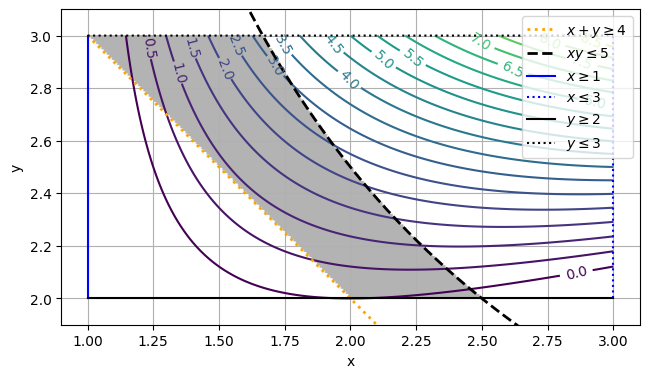

In [ ]:
# Definir Pontos da Função Objetivo NLP
g = np.linspace(1,3,200)
h = np.linspace(2,3,200)
x,y = np.meshgrid(g,h)
obj = x*y**2-x**2-y**2

# Plotar Curvas de Contorno da Função Objetivo
CS = plt.contour(x,y,obj,np.round(np.linspace(0,10,21),1))
plt.clabel(CS, inline=1, fontsize=10)

# Definir Curvas de Restrições
x0 = np.linspace(1,3,2000)
y0 = 4-x0    # x+y>=4
y1 = 5.0/x0  # x*y<=5

# Plotar Curvas de Restrições
plt.plot(x0,y0,':',color='orange',linewidth=2,label=r'$x+y\geq4$')
plt.plot(x0,y1,'k--',linewidth=2,label=r'$xy\leq5$')
plt.plot([1,1],[2,3],'b-',label=r'$x\geq1$')
plt.plot([3,3],[2,3],'b:',label=r'$x\leq3$')
plt.plot([1,3],[2,2],'k-',label=r'$y\geq2$')
plt.plot(x0, 3*np.ones_like(x0),'k:',label=r'$y\leq3$')

# Sombrear a Região Viável
plt.imshow(((x+y>=4)&(x*y<=5)&(x>=0)&(y>=0)).astype(int),
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);

# Ajeitar eixos e aparência
plt.xlim(0.9,3.1); plt.ylim(1.9,3.1); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()